In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


%matplotlib inline

In [2]:
#Increasing variables in a prior model by adding dummies for qualitative quality variables

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
#imported both data sets

In [5]:
train = pd.read_csv('../datasets/train_clean.csv')

In [6]:
test = pd.read_csv('../datasets/test_clean.csv')

In [7]:
tmp_train_dum = pd.get_dummies(train, columns =['bsmt_qual','bldg_type','house_style','roof_style',
                                                 'exter_qual','kitchen_qual'],drop_first=True)

In [8]:
tmp_test_dum = pd.get_dummies(test,columns =['bsmt_qual','bldg_type','house_style','roof_style',
                                                 'exter_qual','kitchen_qual'],drop_first=True)

In [9]:
train = tmp_train_dum
test = tmp_test_dum

In [10]:
features =['lot_area', 'overall_qual', 'overall_cond', 'year_built',
        'year_remod_add', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area',
        'full_bath', 'half_bath', 'bedroom_abvgr', 'totrms_abvgrd',
        'fireplaces', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
        '3ssn_porch', 'screen_porch', 'mo_sold', 'yr_sold', 'lot_frontage',
        'mas_vnr_area', 'total_bsmt_sf', 'bsmt_full_bath',
        'bsmt_half_bath', 'garage_yr_blt', 'garage_cars', 'garage_area','bsmt_qual_Fa', 'bsmt_qual_Gd',
       'bsmt_qual_Po', 'bsmt_qual_TA', 'bsmt_qual_none', 'bldg_type_2fmCon',
       'bldg_type_Duplex', 'bldg_type_Twnhs', 'bldg_type_TwnhsE',
       'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin',
       'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer',
       'house_style_SLvl', 'roof_style_Gable', 'roof_style_Gambrel',
       'roof_style_Hip', 'roof_style_Mansard', 'roof_style_Shed',
       'exter_qual_Fa', 'exter_qual_Gd', 'exter_qual_TA', 'kitchen_qual_Fa',
       'kitchen_qual_Gd', 'kitchen_qual_TA']
X_train = train[features]
X_test = test[features]
y_train_overfit = train['saleprice']

In [11]:
#Create PolynomialFeatures

In [12]:
poly= PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

#instatiate a model

In [13]:
X_train_overfit = poly.fit_transform(X_train)
X_test_overfit = poly.fit_transform(X_test)

In [14]:
ss_overfit = StandardScaler()

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(X_train_overfit, y_train_overfit)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
predictions = lr.predict(X_train_overfit)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

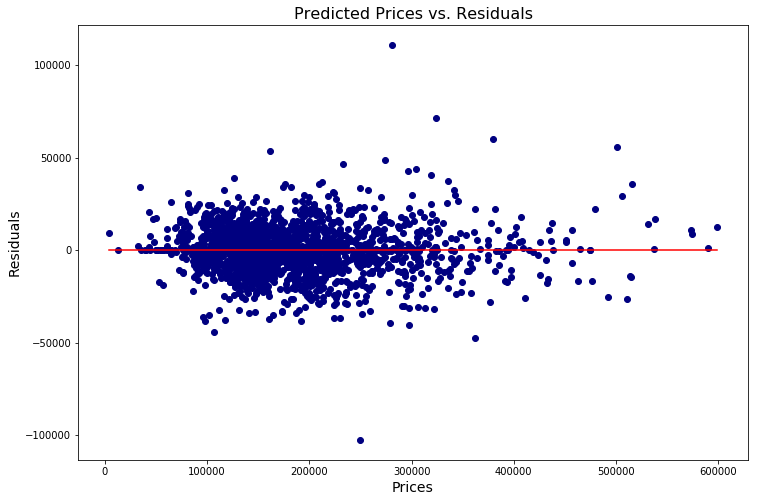

In [18]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [19]:
r2_score(y_train_overfit, predictions)

0.9739880718235967

In [20]:
#create Ridge Model

In [21]:
ridge_mod = Ridge(alpha=10)

In [22]:
ridge_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.82908e-21): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
ridge_predictions = ridge_mod.predict(X_train_overfit)

In [24]:
r2_score(y_train_overfit, ridge_predictions)

0.9711234961324534

In [25]:
r_alph = np.logspace(0, 10, 200)

In [26]:
ridge_mod = RidgeCV(alphas=r_alph, scoring='r2', cv=5)

In [27]:
ridge_mod = ridge_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.3681e-22): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.65959e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.16732e-22): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.16295e-22): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.48166e-22): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.38437e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.86727e-22): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.43775e-22): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.09253e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.62826e-22): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.94658e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.36597e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.63747e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.64991e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.7427e-20): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.43157e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.30257e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.12426e-21): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.14901e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.9743e-21): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.49593e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.04629e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.74187e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.69317e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.65625e-21): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.69804e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.38566e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.78182e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.41674e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.00492e-20): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.64621e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.70643e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.03874e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.88525e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.82604e-19): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.28699e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.50866e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.64998e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.15079e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.98408e-18): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.77435e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.21149e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.13822e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.8536e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.20395e-18): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.08804e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.81002e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.18862e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.99669e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.88239e-18): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.87352e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.11101e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.39759e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.11873e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.26317e-18): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.8068e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.73973e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.91226e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.86414e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.0186e-17): result may not be accurate.
  overwrite_a=True)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.22353e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.18744e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.61191e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.06433e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.82497e-17): result may not be accurate.
  overwrite_a=Tru

In [28]:
ridge_mod.alpha_

10000000000.0

In [29]:
y_train_ridge_pred = ridge_mod.predict(X_train_overfit)
y_test_ridge_pred = ridge_mod.predict(X_test_overfit)

In [30]:
predictions = y_train_ridge_pred
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

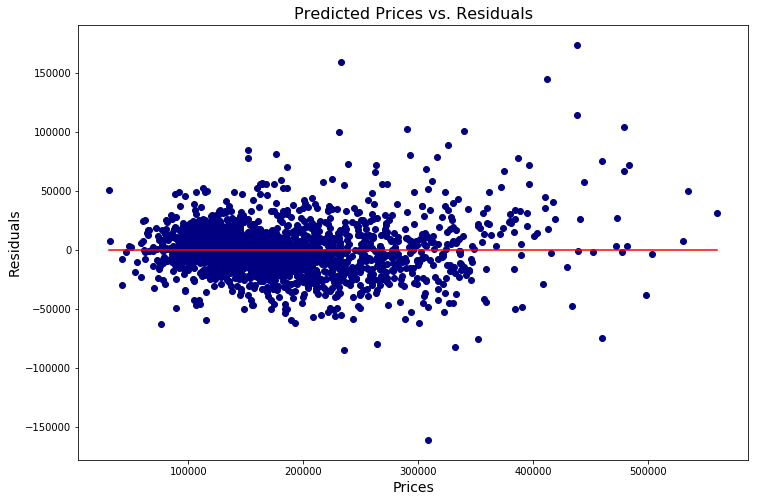

In [31]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [32]:
r2_score(y_train_overfit, y_train_ridge_pred)

0.9233037203718187

In [33]:
#create Lasso model

In [34]:
las_alph = np.logspace(-3, 0, 100)

In [35]:
las_mod = LassoCV(alphas=las_alph, cv=5)

In [36]:
las_mod = las_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

In [37]:
# Generate predictions
y_train_las_pred = las_mod.predict(X_train_overfit)
y_test_las_pred = las_mod.predict(X_test_overfit)

# Evaluate model.
print(r2_score(y_train_overfit, y_train_las_pred))

0.9695780118219115


In [38]:
predictions = y_train_las_pred
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

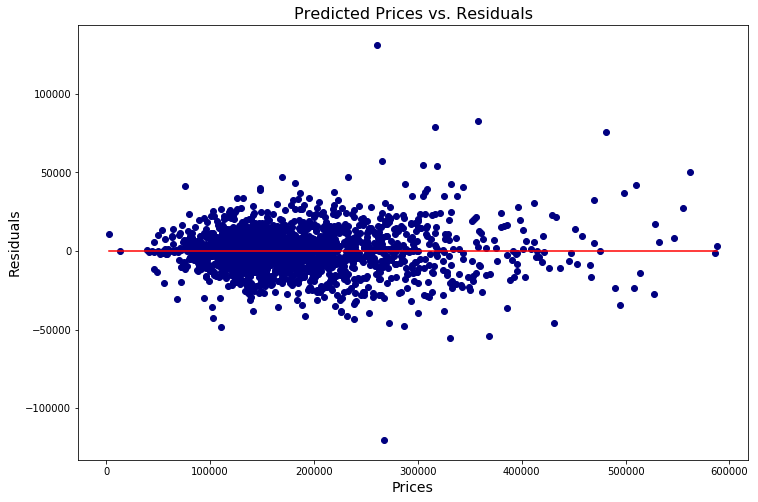

In [39]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [40]:
las_mod.alpha_

1.0

In [41]:
r2_score(y_train_overfit, y_train_ridge_pred)

0.9233037203718187

In [42]:
ridge_mod.coef_

array([ 5.42316422e-04,  1.40101640e-04,  8.91995765e-05, ...,
       -7.30222691e-05,  0.00000000e+00, -4.74233294e-05])

In [43]:
las_mod.coef_

array([ 4.32089294e+00,  2.88436266e+04, -6.96433526e+03, ...,
        3.41486154e+03,  0.00000000e+00, -1.44800900e+03])

In [44]:
#created a new dataframe for my submission 

In [45]:
submission = pd.DataFrame(columns=[])

In [46]:
#assigned data to dataframe

In [47]:
#submission = pd.DataFrame(columns=[test['id']
submission['Id'] = test['id']
submission['SalePrice'] = y_test_ridge_pred

In [48]:
submission.to_csv('../submissions/submission_fourteen.csv',index=False)

In [49]:
submission['SalePrice'] = y_test_las_pred

In [50]:
submission.to_csv('../submissions/submission_fifteen.csv',index=False)